# SVD

Сія картинка хранится въ `img/pic.jpg`:

![1](img/pic.jpg)

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from sys import getsizeof

In [4]:
img_path = "fractal.jpg"
BYTE = 8

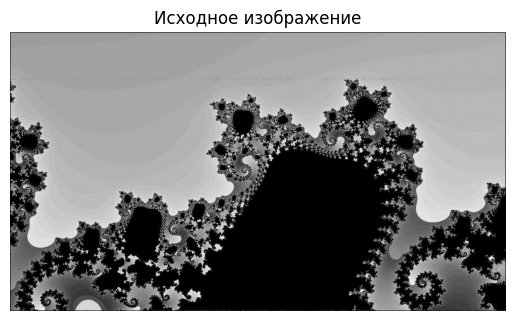

Размер: 2073633 байт.


In [5]:
img = Image.open(img_path).convert("L")

np_img = np.array(img.getdata(band=0), dtype=np.float32)
np_img.shape = (img.size[1], img.size[0])
#np_img = np.transpose(np_img)

plt.imshow(np_img, cmap="gray")
plt.axis("off")
plt.title("Исходное изображение")
plt.show()

size = getsizeof(img.tobytes()) # np_img.shape[0] * np_img.shape[1]
print(f"Размер: {size} байт.")

In [7]:
U, S, Vh = np.linalg.svd(np_img, full_matrices=False) # не трогать лишний раз!

new size is:  (1080, 1920)


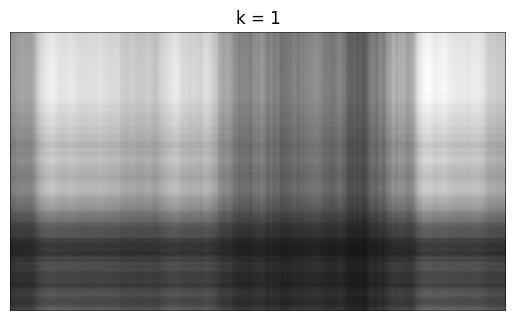

Размер: 2073633 байт. Занимает в 1.00 раз меньше памяти.
new size is:  (1080, 1920)


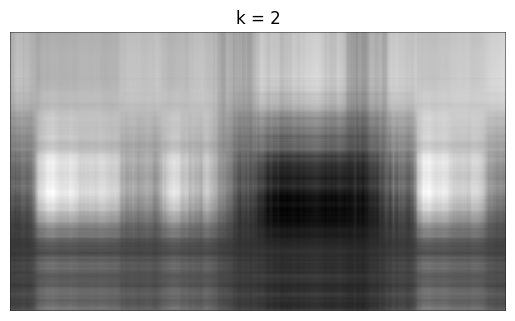

Размер: 2073633 байт. Занимает в 1.00 раз меньше памяти.
new size is:  (1080, 1920)


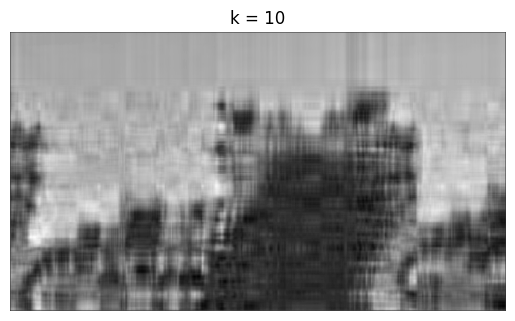

Размер: 2073633 байт. Занимает в 1.00 раз меньше памяти.
new size is:  (1080, 1920)


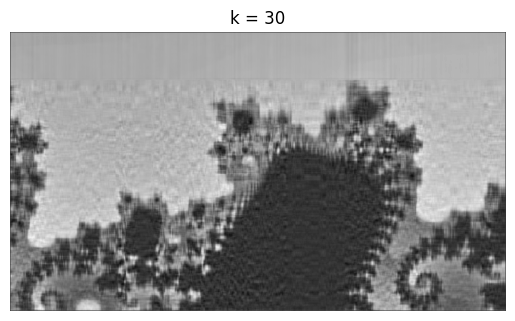

Размер: 2073633 байт. Занимает в 1.00 раз меньше памяти.
new size is:  (1080, 1920)


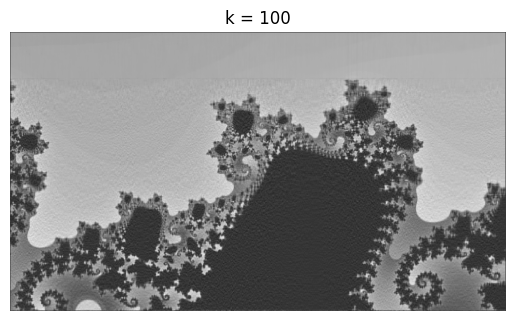

Размер: 2073633 байт. Занимает в 1.00 раз меньше памяти.


In [9]:
for k in (1, 2, 10, 30, 100):
    #print("DIM IS", np.diag(S[:k]).shape,  Vh[:k, :].shape)
    z = np.zeros(U.shape)
    np.fill_diagonal(z, S)
    
    approx = np.array( U @ z @ Vh)

    approx = np.array( U[:, :k] @ np.diag(S[:k]) @ Vh[:k, :] )
    print("new size is: ", approx.shape)
    plt.imshow(approx, cmap="gray")
    plt.axis("off")
    plt.title(f"k = {k}")
    plt.show()

    appr_img = Image.fromarray(np.asarray(approx, dtype=np.uint8))
    
    appr_size = getsizeof(appr_img.tobytes())
    print(f"Размер: {appr_size} байт. Занимает в {size / appr_size:.2f} раз меньше памяти.")